In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import axes3d

In [84]:
eps  = 0.1
t0, tmax = 0, 7
a0, amax = eps,2
b0, bmax = 0, 2
M, N = 200, 200
 
a_valores = np.linspace(a0, tmax, N)
b_valores = np.linspace(b0, bmax, N)
t_valores = np.linspace(0, tmax, N)


In [85]:
def f(t,a,b):
    return -a*np.log(1+b/a)+b + (a+b)*(1- np.exp(-t/a))

In [86]:
f_valores = f(t_valores,0.45,0.75)

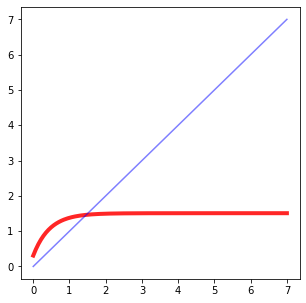

In [87]:
fig = plt.figure(figsize =(5,5))
ax = fig.subplots(1, 1)
ax.plot(t_valores,f_valores,  c='r',  linewidth=4, alpha=0.85)
ax.plot(t_valores,t_valores,  c='b', alpha=0.5)
plt.show()

In [88]:
def eqn(t,a,b):
    return t + a*np.log(1+b/a)-b - (a+b)*(1- np.exp(-t/a))

In [77]:
def t_desc(a,b):
    ta = a*np.log(1+b/a)
    td =  fsolve(eqn, x0=ta, args = (a,b))
    return td[0] 

In [78]:
desc = np.vectorize(t_desc)

In [79]:
t_desc(0.5, 0.9) 

1.7422539016600291

In [89]:
aa, bb =  np.meshgrid(a_valores,b_valores)
td = desc(aa, bb)

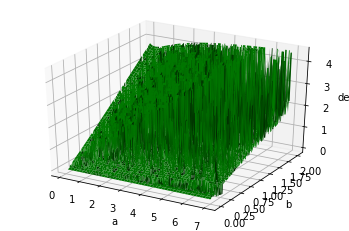

In [90]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(aa, bb, td, color='green')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('desc')

plt.show()